In [1]:
import random
import numpy as np
import keras
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
print('tf.__version__='+tf.__version__)
print('keras.__version__='+keras.__version__)

tf.__version__=1.3.0
keras.__version__=1.2.2


In [3]:
# This is the secret algorithm we would like to break
def calculate_y(x):
    x0 = x[0]
    x1 = x[1]
    x2 = x[2]
    x3 = x[3]
    
    if x0==0 and x1==0 and x2==1:
        y = 1
    elif x0==0 and x1==0 and x2==2:
        y = 2
    elif x0==0 and x1==0 and x2==3:
        y = 3
    else:
        y = 0
    
    return y
    

In [4]:
def create_x_y(nb_samples):
    
    for i in range(nb_samples):

        x0 = int(random.uniform(0, 3))
        x1 = int(random.uniform(0, 3))
        x2 = int(random.uniform(0, 3))
        x3 = int(random.uniform(0, 10))
        x = np.array([x0, x1, x2, x3])
        y = calculate_y(x)
        
        # if only on sample, let's return it
        if i == 0:
            X = np.stack([x])
            Y = np.stack([y])
        # otherwise, stack them together
        else:
            X = np.vstack([X, x])
            Y = np.vstack([Y, y])

    return X, Y

In [5]:
def to_one_hot(labels, dimension=4):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [6]:
#print(to_one_hot([0,1,2,3]))

In [7]:
#print(create_x_y(100))

In [8]:
#train_data, train_targets = create_x_y(int(nb_samples*.8)
#print(train_data.shape)
#print(train_targets.shape)

test_data, test_targets = create_x_y(10)
print(test_targets)
print(test_data.shape)
print(test_data.shape[1])
print(test_targets.shape)

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
(10, 4)
4
(10, 1)


In [28]:
nb_features = 4
model = models.Sequential()
dense1 = model.add(layers.Dense(64, activation='relu', input_shape=(nb_features,)))
model.add(layers.Dense(64, activation='relu'))
dense2 = model.add(layers.Dense(4, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
model.get_weights()

[array([[ 0.18462187,  0.27944225, -0.15826008, -0.0129047 , -0.271171  ,
          0.15089294,  0.13135508, -0.29143903,  0.10521197, -0.13418977,
         -0.02750462, -0.07742067,  0.26466602,  0.18798637,  0.161407  ,
          0.04837978,  0.28884608,  0.26538807,  0.08402535,  0.12140802,
         -0.2733678 , -0.24578136,  0.27479887,  0.07557422,  0.19712588,
          0.1411739 , -0.21707249,  0.08724728,  0.27339125, -0.03663883,
          0.03280884,  0.06031615, -0.04925507, -0.11493094,  0.24619424,
         -0.17485434,  0.27360344,  0.2771036 ,  0.27220494, -0.20620438,
         -0.14461403, -0.29408708,  0.05026668,  0.11174217, -0.03475875,
         -0.18606074,  0.14765677,  0.22381014,  0.025415  , -0.17301178,
          0.13259381,  0.18251446, -0.21593383,  0.22360033, -0.01319364,
          0.03046182,  0.18188325, -0.17439881,  0.06840646, -0.24104649,
          0.12061509,  0.07001069,  0.22086829, -0.01755664],
        [-0.10359395,  0.10329664, -0.14735012,  0

In [34]:
# ONLINE, STEP BY STEP in ONLINE MODE !!!
for i in range(2000):
    x, y = create_x_y(1)
    history = model.fit(x, to_one_hot(y), nb_epoch=5, batch_size=1,  verbose=1)

In [12]:
# ALL IN ONE STEP ('OSSIFIED')
x, y = create_x_y(2000)
history = model.fit(x, to_one_hot(y), nb_epoch=20, batch_size=1,  verbose=1)
    
    

Epoch 1/20
2000/2000 [==============================] - 2s - loss: 0.1315 - acc: 0.9550     
Epoch 2/20
2000/2000 [==============================] - 2s - loss: 0.0377 - acc: 0.9835     
Epoch 3/20
2000/2000 [==============================] - 2s - loss: 0.0152 - acc: 0.9970     
Epoch 4/20
2000/2000 [==============================] - 2s - loss: 0.0057 - acc: 0.9975     
Epoch 5/20
2000/2000 [==============================] - 2s - loss: 0.0049 - acc: 0.9985     
Epoch 6/20
2000/2000 [==============================] - 2s - loss: 8.5021e-04 - acc: 0.9995     
Epoch 7/20
2000/2000 [==============================] - 2s - loss: 1.6301e-04 - acc: 1.0000     
Epoch 8/20
2000/2000 [==============================] - 2s - loss: 1.3819e-04 - acc: 1.0000     
Epoch 9/20
2000/2000 [==============================] - 2s - loss: 7.3891e-06 - acc: 1.0000     
Epoch 10/20
2000/2000 [==============================] - 2s - loss: 9.6046e-06 - acc: 1.0000     
Epoch 11/20
2000/2000 [==========================

In [13]:
test_data

array([[2, 1, 0, 4],
       [1, 1, 1, 2],
       [0, 0, 0, 2],
       [2, 0, 0, 9],
       [0, 0, 1, 4],
       [1, 2, 2, 2],
       [2, 0, 1, 6],
       [1, 0, 0, 8],
       [2, 1, 0, 9],
       [2, 1, 1, 1]])

In [14]:
arr = model.predict(test_data)[0]
arr

array([1., 0., 0., 0.], dtype=float32)

In [15]:
np.argmax(arr)

0

In [16]:
def max_ndarray(array):
    max_v = -1.0
    max_i = -1
    for i in range(len(array)):
        val = array[i]
        if val > max_v:
            max_v = val
            max_i = i
    return max_i, max_v

max_ndarray(arr) 

(0, 1.0)

In [17]:
#unit test
arr = np.array([0.1 , 0.4 , 0.3 , 0.2 ])
assert  max_ndarray(arr) == (1, 0.4)

In [18]:
np.amax(model.predict(test_data)[0])

1.0

In [19]:
#np.int(np.round(model.predict(test_data).dot(np.array([1, 2, 3, 4]))-1))

In [20]:
y = test_targets
y

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [21]:
td0 = np.stack([test_data[3]])
td0

array([[2, 0, 0, 9]])

In [22]:
model.predict(td0)

array([[1., 0., 0., 0.]], dtype=float32)

In [23]:
np.round(model.predict(td0).dot(np.array([1, 2, 3, 4]))-1)

array([0.])

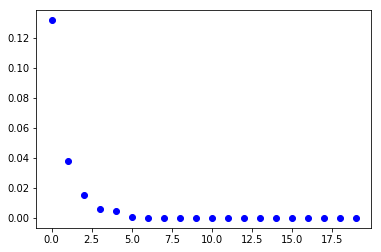

In [26]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.show()

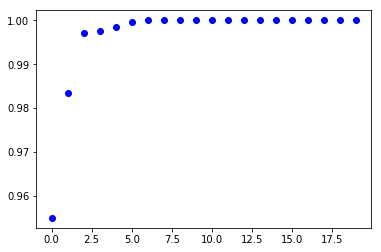

In [27]:
acc = history.history['acc']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.show()

In [35]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.show()

AttributeError: 'list' object has no attribute 'history'

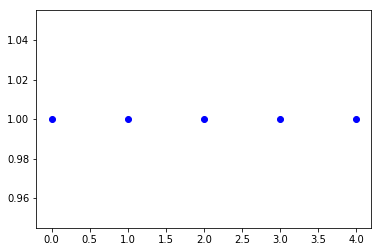

In [31]:
acc = history.history['acc']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.show()